<a href="https://colab.research.google.com/github/roggersanguzu/Intelligent-Mesh-Network-Honeypot-Orchestrator/blob/main/Network_Honeypot_Orhestrator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [59]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Network Honeypot Orhestrator Datasets/honeypot_data_chunk_1.csv")
print("Original shape:", df.shape)

Original shape: (1000000, 30)


Auditing the Data for any problems

In [60]:
pd.options.display.max_columns = None
df

,node_id,device_type,firmware_version,battery_level,cpu_usage,memory_usage,uptime_seconds,is_gateway,os_type,firmware_integrity,neighbor_count,avg_rtt_ms,packet_loss_rate,network_centrality_score,tx_bytes,rx_bytes,protocol_used,port_activity,comm_frequency_sec,encryption_enabled,failed_login_attempts,unexpected_traffic_pattern,service_beaconing,peer_auth_failures,malformed_packet_rate,payload_entropy_score,role_change_frequency,device_spoofing_score,honeypot_decoy_match_score,attack_flag
0,node_0,gateway,1.1,30.20,57.06,10.11,57370,False,FreeRTOS,tampered,4,185.47,8.80,0.0186,3316124,906638,WiFi Mesh,"1362,3412,1539,8044",47,No,9,False,False,2,0.56,0.6880,0,0.5654,0.0279,Recon
1,node_1,sensor,3.0,33.45,48.92,73.29,5290500,False,RIOT,tampered,11,44.28,4.70,0.9771,4344494,2127700,Thread,"2550,6797,3604,2816",459,Yes,2,False,False,5,0.69,0.1333,1,0.8437,0.6753,Exploitation
2,node_2,gateway,1.1,11.15,93.20,15.22,8807272,False,RIOT,OK,4,248.88,0.93,0.5288,16876,1175739,WiFi Mesh,"7430,6766,1523",242,Yes,11,True,True,10,3.95,0.9973,3,0.3899,0.3846,Recon
3,node_3,actuator,1.0,92.22,93.55,13.47,6336205,False,RIOT,OK,6,36.20,7.92,0.5115,2619165,976804,Thread,"3917,7356,4930",544,No,17,False,True,10,0.05,0.1945,3,0.0337,0.7032,Recon
4,node_4,actuator,1.0,16.99,61.28,24.23,8764544,False,RIOT,unknown,5,36.06,9.70,0.2006,1309956,435735,Zigbee,"4965,4679",63,No,0,True,True,5,2.16,0.4758,1,0.9808,0.9532,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,node_999995,actuator,2.1,58.08,24.17,23.61,4231062,False,RIOT,unknown,10,3.93,5.18,0.3881,4591782,555116,Zigbee,"6897,5261",425,Yes,8,False,True,0,2.00,0.6961,4,0.6994,0.8225,Normal
999996,node_999996,gateway,2.0,73.72,72.45,12.02,7625970,False,FreeRTOS,unknown,12,7.82,9.37,0.9560,3117099,4616462,WiFi Mesh,"4112,1064,2469,8726,3855",466,Yes,15,True,False,6,4.22,0.4918,0,0.6358,0.4447,Exploitation
999997,node_999997,camera,2.0,87.31,82.76,96.51,8180711,False,FreeRTOS,tampered,9,160.55,5.04,0.1252,4826790,4703008,WiFi Mesh,"6944,5483,5265,6017",405,Yes,20,False,True,1,3.01,0.8104,3,0.4963,0.8839,Exploitation
999998,node_999998,gateway,1.0,16.83,29.94,8.62,638073,True,Linux,OK,3,7.62,9.75,0.1251,3957625,4996454,LoRaWAN,"6714,3805",386,No,7,True,True,8,1.27,0.6350,3,0.5315,0.5271,Lateral Movement


In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   node_id                     1000000 non-null  object 
 1   device_type                 1000000 non-null  object 
 2   firmware_version            1000000 non-null  float64
 3   battery_level               1000000 non-null  float64
 4   cpu_usage                   1000000 non-null  float64
 5   memory_usage                1000000 non-null  float64
 6   uptime_seconds              1000000 non-null  int64  
 7   is_gateway                  1000000 non-null  bool   
 8   os_type                     1000000 non-null  object 
 9   firmware_integrity          1000000 non-null  object 
 10  neighbor_count              1000000 non-null  int64  
 11  avg_rtt_ms                  1000000 non-null  float64
 12  packet_loss_rate            1000000 non-null  float64
 13

In [62]:
print(df.isnull().sum())

node_id                       0
device_type                   0
firmware_version              0
battery_level                 0
cpu_usage                     0
memory_usage                  0
uptime_seconds                0
is_gateway                    0
os_type                       0
firmware_integrity            0
neighbor_count                0
avg_rtt_ms                    0
packet_loss_rate              0
network_centrality_score      0
tx_bytes                      0
rx_bytes                      0
protocol_used                 0
port_activity                 0
comm_frequency_sec            0
encryption_enabled            0
failed_login_attempts         0
unexpected_traffic_pattern    0
service_beaconing             0
peer_auth_failures            0
malformed_packet_rate         0
payload_entropy_score         0
role_change_frequency         0
device_spoofing_score         0
honeypot_decoy_match_score    0
attack_flag                   0
dtype: int64


In [63]:
print((df == '').sum())

node_id                       0
device_type                   0
firmware_version              0
battery_level                 0
cpu_usage                     0
memory_usage                  0
uptime_seconds                0
is_gateway                    0
os_type                       0
firmware_integrity            0
neighbor_count                0
avg_rtt_ms                    0
packet_loss_rate              0
network_centrality_score      0
tx_bytes                      0
rx_bytes                      0
protocol_used                 0
port_activity                 0
comm_frequency_sec            0
encryption_enabled            0
failed_login_attempts         0
unexpected_traffic_pattern    0
service_beaconing             0
peer_auth_failures            0
malformed_packet_rate         0
payload_entropy_score         0
role_change_frequency         0
device_spoofing_score         0
honeypot_decoy_match_score    0
attack_flag                   0
dtype: int64


In [64]:
print(df.describe(include='all'))

            node_id device_type  firmware_version   battery_level  \
count       1000000     1000000    1000000.000000  1000000.000000   
unique      1000000           4               NaN             NaN   
top     node_999983    actuator               NaN             NaN   
freq              1      250701               NaN             NaN   
mean            NaN         NaN          1.840197       55.017623   
std             NaN         NaN          0.734221       25.996598   
min             NaN         NaN          1.000000       10.000000   
25%             NaN         NaN          1.100000       32.510000   
50%             NaN         NaN          2.000000       55.030000   
75%             NaN         NaN          2.100000       77.570000   
max             NaN         NaN          3.000000      100.000000   

             cpu_usage    memory_usage  uptime_seconds is_gateway   os_type  \
count   1000000.000000  1000000.000000    1.000000e+06    1000000   1000000   
unique       

Drop columns with more than 40% missing values



In [65]:
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

Handle Missing/Dirty Categorical Data

In [66]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].replace('', pd.NA)
    df[col] = df[col].fillna(df[col].mode()[0])


Handle Missing Numerical Data

In [67]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

Encode Categorical Data

In [68]:
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


Feature/Target Split

In [69]:
X = df.drop(['attack_flag', 'node_id'], axis=1)
y = df['attack_flag']

Encode target if it’s still string

In [70]:
if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

Split into Train/Test

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Address Class Imbalance

In [48]:
print("Class distribution before SMOTE:", np.unique(y_train, return_counts=True))

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", np.unique(y_train, return_counts=True))


Class distribution before SMOTE: (array([0, 1, 2, 3]), array([200359, 199737, 199953, 199951]))
Class distribution after SMOTE: (array([0, 1, 2, 3]), array([200359, 200359, 200359, 200359]))


I used Feature Scaling (Optional for XGBoost, Required for Other Models)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training with XGBoost

In [50]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:11:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Model Evaluation

In [51]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.249175
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.24      0.25     50090
           1       0.25      0.25      0.25     49934
           2       0.25      0.26      0.25     49988
           3       0.25      0.25      0.25     49988

    accuracy                           0.25    200000
   macro avg       0.25      0.25      0.25    200000
weighted avg       0.25      0.25      0.25    200000

Confusion Matrix:
 [[12230 12376 13032 12452]
 [12256 12365 12781 12532]
 [12253 12214 12874 12647]
 [12357 12435 12830 12366]]


Visualizations

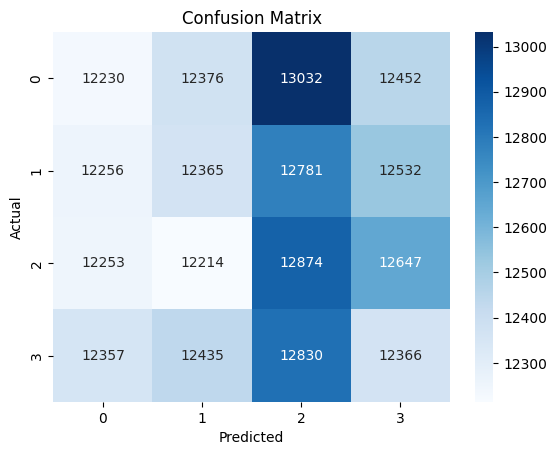

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Save Your Trained Model

In [73]:
import joblib
joblib.dump(model, "honeypot_model_xgb.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Here I am Predictin Using another New Datasets.

In [74]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

In [75]:
df_new = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Network Honeypot Orhestrator Datasets/honeypot_data_chunk_10.csv")
print("New dataset shape:", df_new.shape)


New dataset shape: (1000000, 30)


Data Cleaning (Handle NaN / Missing / Duplicates) like i did when data cleaning

In [76]:
df_new = df_new.drop_duplicates()

df_new.fillna(df_new.median(numeric_only=True), inplace=True)

df_new = df_new.select_dtypes(include=[np.number])


In [77]:
model = joblib.load("honeypot_model_xgb.pkl")
scaler = joblib.load("scaler.pkl")

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


cat_cols = df.select_dtypes(include='object').columns
le_dict = {}

for col in cat_cols:
    df[col] = df[col].replace('', pd.NA)
    df[col] = df[col].fillna(df[col].mode()[0])
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [82]:
predictions = model.predict(X_scaled)
prediction_proba = model.predict_proba(X_scaled)

In [83]:
print("Predictions on the new dataset:")
print(predictions)
print(prediction_proba)

Predictions on the new dataset:
[3 0 3 ... 0 1 2]
[[0.2541406  0.22639759 0.23200561 0.28745618]
 [0.25709543 0.24168493 0.24627185 0.25494784]
 [0.23222189 0.22020753 0.22985671 0.3177139 ]
 ...
 [0.26470116 0.261021   0.23099023 0.24328765]
 [0.24570277 0.27053747 0.21542834 0.2683314 ]
 [0.24356636 0.25415453 0.26443097 0.23784813]]


In [87]:
class_map = {
    0: "Normal",
    1: "Recon",
    2: "Exploitation",
    3: "Lateral Movement",
    4: "Command & Control"
}

df_new['prediction'] = predictions

df_new['prediction_label'] = df_new['prediction'].map(class_map)
df_new.head()

,firmware_version,battery_level,cpu_usage,memory_usage,uptime_seconds,neighbor_count,avg_rtt_ms,packet_loss_rate,network_centrality_score,tx_bytes,rx_bytes,comm_frequency_sec,failed_login_attempts,peer_auth_failures,malformed_packet_rate,payload_entropy_score,role_change_frequency,device_spoofing_score,honeypot_decoy_match_score,prediction,prediction_label
0,1.1,98.39,27.08,58.75,5248941,8,4.54,8.22,0.9362,1518874,2010381,20,7,5,1.69,0.1532,0,0.6096,0.8882,3,Lateral Movement
1,2.0,54.44,15.36,98.03,3842267,11,311.11,9.57,0.3502,1710170,2329949,597,1,5,2.95,0.1245,2,0.4545,0.1363,0,Normal
2,1.0,53.59,14.56,45.65,9483273,6,331.85,0.92,0.9997,1148386,2462825,594,4,10,1.90,0.4531,0,0.8865,0.3131,3,Lateral Movement
3,1.1,29.68,72.34,53.93,840429,6,57.32,5.28,0.1932,2709559,2879849,42,1,1,3.75,0.0886,0,0.5979,0.8474,1,Recon
4,3.0,31.93,43.00,37.60,4878362,3,408.53,7.90,0.4736,1789032,4148243,116,17,0,4.36,0.8409,0,0.4543,0.0362,1,Recon
